In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

# Defining the number of classes
number_of_classes = 2

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Add classification layers
x = Flatten()(transfer_layer.output)
x = Dense(256, activation = 'relu')(x)

# Adding dense layer
x = Dropout(0.3)(x)

# Add dense layer
x = BatchNormalization()(x)
pred = Dense(number_of_classes, activation = 'softmax')(x)
model4 = Model(vgg.input, pred)

In [ ]:
# Compiling the model
model4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2),
    ModelCheckpoint(filepath='model_weights.hdf5', monitor='val_loss', save_best_only=True)
]

In [ ]:
# Fitting the model
history4 = model4.fit(
    x=train_images_aligned,
    y=train_labels_aligned,
    epochs=10,
    batch_size=64,
    validation_split = 0.2,
)

Epoch 1/10
312/312 [==============================] - 1268s 4s/step - loss: 0.9137 - accuracy: 0.5053 - val_loss: 0.7591 - val_accuracy: 0.5000
Epoch 2/10
312/312 [==============================] - 1232s 4s/step - loss: 0.8314 - accuracy: 0.5210 - val_loss: 0.7385 - val_accuracy: 0.4990
Epoch 3/10
312/312 [==============================] - 1259s 4s/step - loss: 0.7943 - accuracy: 0.5296 - val_loss: 0.7360 - val_accuracy: 0.5024
Epoch 4/10
312/312 [==============================] - 1231s 4s/step - loss: 0.7610 - accuracy: 0.5433 - val_loss: 0.7316 - val_accuracy: 0.5014
Epoch 5/10
312/312 [==============================] - 1245s 4s/step - loss: 0.7392 - accuracy: 0.5521 - val_loss: 0.7297 - val_accuracy: 0.4910
Epoch 6/10
312/312 [==============================] - 1243s 4s/step - loss: 0.7139 - accuracy: 0.5703 - val_loss: 0.7306 - val_accuracy: 0.5002
Epoch 7/10
312/312 [==============================] - 1249s 4s/step - loss: 0.6965 - accuracy: 0.5820 - val_loss: 0.7235 - val_accuracy:

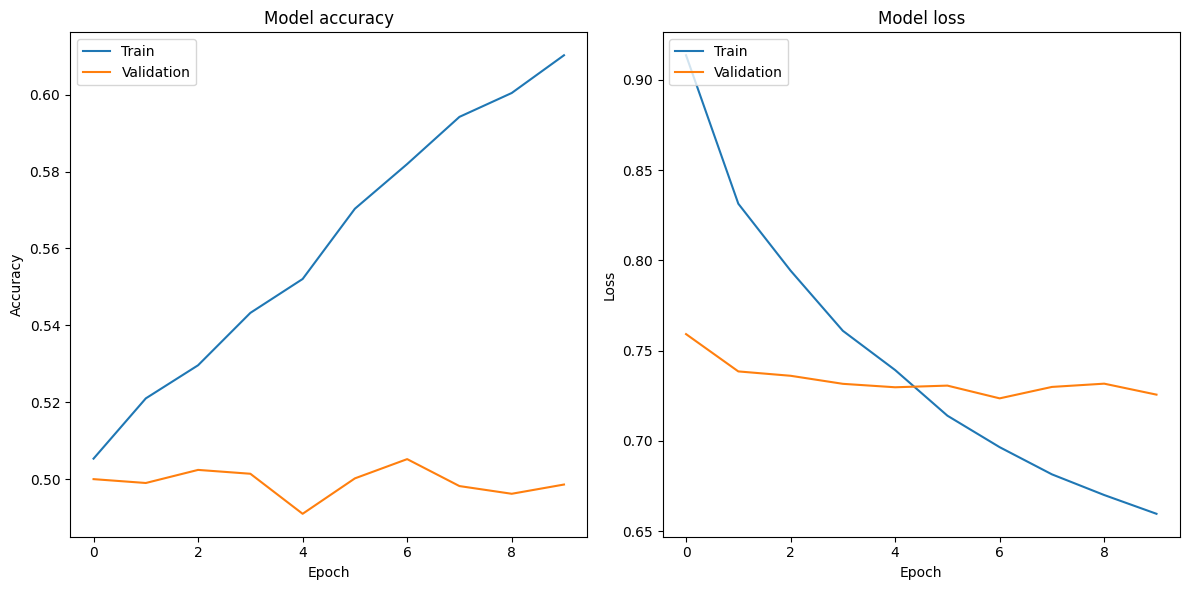

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluating the model

test_loss, test_accuracy = model4.evaluate(test_images, test_labels_one_hot, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

82/82 [==============================] - 128s 2s/step - loss: 3.6044 - accuracy: 0.4904
Test Loss: 3.6043732166290283
Test Accuracy: 0.49038460850715637


In [ ]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

82/82 [==============================] - 126s 2s/step


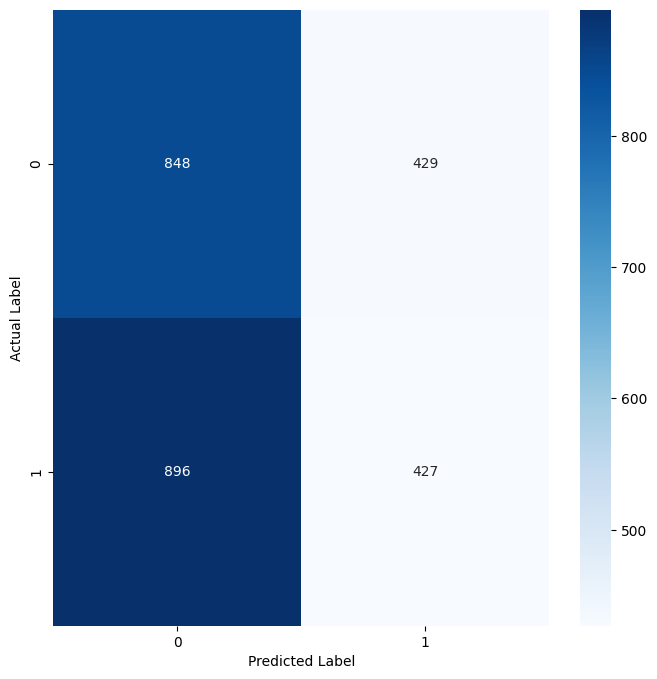

Classification Report
              precision    recall  f1-score   support

     Class 0       0.49      0.66      0.56      1277
     Class 1       0.50      0.32      0.39      1323

    accuracy                           0.49      2600
   macro avg       0.49      0.49      0.48      2600
weighted avg       0.49      0.49      0.48      2600



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential

# Predict the classes of the test images.
y_pred4 = model4.predict(test_images)

# Convert predictions classes from one hot vectors
y_pred_classes4 = np.argmax(y_pred4, axis = 1)

# Convert validation observations from one hot vectors
y_true4 = np.argmax(test_labels_one_hot, axis = 1)

# compute the confusion matrix
confusion_mtx4 = confusion_matrix(y_true4, y_pred_classes4)

# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx4, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Generate a classification report
print('Classification Report')
print(classification_report(y_true4, y_pred_classes4, target_names=['Class 0', 'Class 1']))


In [ ]:
! jupyter nbconvert --to html "/content/Reference_Notebook_Malaria_Detection_Full_Code_Cedric_final.ipynb"

[NbConvertApp] Converting notebook /content/Reference_Notebook_Malaria_Detection_Full_Code_Cedric_final.ipynb to html
[NbConvertApp] Writing 3178649 bytes to /content/Reference_Notebook_Malaria_Detection_Full_Code_Cedric_final.html
